# Import software libraries

In [61]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

%matplotlib inline

# Load and preview the data

In [62]:
df = pd.read_pickle('users_data_final.pickle')
df

,user_id,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.00,1,0,0,0,0,0,0,...,261,1,-1,0,False,0,0,0,4,8
1,bb92765a-08de-4963-b432-496524b39157,0.0,1369.42,0,1,0,0,0,0,0,...,151,1,-1,0,False,1,0,1,2,7
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.00,0,0,1,0,0,0,0,...,76,1,-1,0,False,0,0,0,1,6
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,0.0,1369.42,0,0,0,1,0,0,0,...,92,1,-1,0,False,0,1,0,3,6
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.00,0,0,0,0,0,0,0,...,198,1,-1,0,False,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,a218c1d6-880a-4431-a314-a1bd3dc36b21,2.0,825.00,0,1,0,0,0,0,0,...,977,3,-1,0,True,1,0,0,3,12
45212,6a6bf402-9416-4e71-97c6-727e8298a3a5,4.0,1729.00,0,0,0,0,1,0,0,...,456,2,-1,0,True,1,0,0,5,11
45213,be32ba96-b178-4b54-b32a-f75b714793df,2.0,5715.00,0,0,0,0,1,0,0,...,1127,5,184,3,True,0,0,0,5,6
45214,44623a48-4e9b-48fd-b155-a17d1c06a754,0.0,1369.42,0,0,0,1,0,0,0,...,508,4,-1,0,False,1,0,0,4,9


# Check the shape of the data

In [63]:
df.shape

(45179, 33)

# Check the data types

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45179 entries, 0 to 45215
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              45179 non-null  object 
 1   number_transactions  45179 non-null  float64
 2   total_amount_usd     45179 non-null  float64
 3   job_management       45179 non-null  int64  
 4   job_technician       45179 non-null  int64  
 5   job_entrepreneur     45179 non-null  int64  
 6   job_blue-collar      45179 non-null  int64  
 7   job_retired          45179 non-null  int64  
 8   job_admin.           45179 non-null  int64  
 9   job_services         45179 non-null  int64  
 10  job_self-employed    45179 non-null  int64  
 11  job_unemployed       45179 non-null  int64  
 12  job_housemaid        45179 non-null  int64  
 13  job_student          45179 non-null  int64  
 14  education_tertiary   45179 non-null  int64  
 15  education_secondary  45179 non-null  int6

# Explore the distribution of the target variable

- You need to plot the distribution of the target column (term_deposit) and explain what is the problem of the distribution.

In [65]:
fig = px.pie(df, names='term_deposit')
fig.show()

# Apply oversampling or SMOTE to the target label

In [66]:
df.drop('user_id', axis=1, inplace=True)


X = df.drop('term_deposit', axis=1)
y = df['term_deposit']

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)  
y_resampled_df = pd.DataFrame(y_resampled, columns=['term_deposit'])  
scaled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)

fig = px.pie(df, names='term_deposit')
fig.show()


# Normalize the data

In [67]:
scaler = MinMaxScaler().fit(df)
print(scaler.data_min_)
print(scaler.data_max_)
scaled_data = scaler.transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df

[ 0.000e+00 -8.019e+03  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.000e+00
 -1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
  0.000e+00  1.000e+00]
[2.00000e+01 1.02127e+05 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00 4.91800e+03 6.30000e+01
 8.71000e+02 2.75000e+02 1.00000e+00 1.00000e+00 1.00000e+00 1.00000e+00
 6.00000e+00 1.20000e+01]


,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,0.15,0.092259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.053070,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.666667,0.636364
1,0.00,0.085236,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.030704,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.333333,0.545455
2,0.10,0.072822,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.015453,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.166667,0.454545
3,0.00,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.018707,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.500000,0.454545
4,0.05,0.072812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040260,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.166667,0.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45174,0.10,0.080293,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.198658,0.032258,0.000000,0.000000,1.0,1.0,0.0,0.0,0.500000,1.000000
45175,0.20,0.088501,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.092721,0.016129,0.000000,0.000000,1.0,1.0,0.0,0.0,0.833333,0.909091
45176,0.10,0.124689,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.229158,0.064516,0.212156,0.010909,1.0,0.0,0.0,0.0,0.833333,0.454545
45177,0.00,0.085236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.103294,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,0.666667,0.727273


# Standardlize the data

In [68]:
scaler = StandardScaler().fit(df)
standarizes_data = scaler.fit_transform(df)
standarizes_data = pd.DataFrame(standarizes_data, columns=df.columns)
standarizes_data

,number_transactions,total_amount_usd,job_management,job_technician,job_entrepreneur,job_blue-collar,job_retired,job_admin.,job_services,job_self-employed,...,duration,campaign,pdays,previous,term_deposit,device_desktop,device_tablet,single,age_group_encoded,month_joined
0,-0.026089,0.285937,1.94405,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,0.011244,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,-0.372153,-0.628092,1.674044,0.437578
1,-0.826099,-0.000123,-0.51439,2.225055,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.416309,-0.569209,-0.411483,-0.251868,-0.363973,1.652861,-0.372153,1.592123,-0.132969,0.145892
2,-0.292759,-0.505776,-0.51439,-0.449427,5.424350,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.707822,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,-0.372153,-0.628092,-1.036476,-0.145795
3,-0.826099,-0.000123,-0.51439,-0.449427,-0.184354,1.909360,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.645633,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,2.687069,-0.628092,0.770537,-0.145795
4,-0.559429,-0.506146,-0.51439,-0.449427,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,-0.233627,-0.569209,-0.411483,-0.251868,-0.363973,-0.605011,-0.372153,1.592123,-1.036476,0.437578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45174,-0.292759,-0.201442,-0.51439,2.225055,-0.184354,-0.523736,-0.229579,-0.359395,-0.318122,-0.190179,...,2.794223,0.076410,-0.411483,-0.251868,2.747459,1.652861,-0.372153,-0.628092,0.770537,1.604325
45175,0.240581,0.132845,-0.51439,-0.449427,-0.184354,-0.523736,4.355804,-0.359395,-0.318122,-0.190179,...,0.769178,-0.246400,-0.411483,-0.251868,2.747459,1.652861,-0.372153,-0.628092,2.577550,1.312639
45176,-0.292759,1.606815,-0.51439,-0.449427,-0.184354,-0.523736,4.355804,-0.359395,-0.318122,-0.190179,...,3.377249,0.722029,1.436044,1.050790,2.747459,-0.605011,-0.372153,-0.628092,2.577550,-0.145795
45177,-0.826099,-0.000123,-0.51439,-0.449427,-0.184354,1.909360,-0.229579,-0.359395,-0.318122,-0.190179,...,0.971294,0.399219,-0.411483,-0.251868,-0.363973,1.652861,-0.372153,-0.628092,1.674044,0.729265


# Plot the PCA

In [69]:
pca = PCA()
pca.fit(scaled_df)
pd.Series(pca.explained_variance_ratio_) 

0     1.657083e-01
1     1.072429e-01
2     8.553307e-02
3     7.102904e-02
4     6.963779e-02
5     6.641717e-02
6     5.235965e-02
7     4.526255e-02
8     4.223235e-02
9     3.463111e-02
10    3.311634e-02
11    3.280637e-02
12    3.254211e-02
13    2.694705e-02
14    1.968323e-02
15    1.743855e-02
16    1.606127e-02
17    1.413843e-02
18    1.192037e-02
19    1.140315e-02
20    9.920159e-03
21    9.088538e-03
22    7.700322e-03
23    5.845232e-03
24    5.401444e-03
25    3.935907e-03
26    8.555523e-04
27    7.404356e-04
28    1.952785e-04
29    1.876280e-04
30    1.868830e-05
31    4.808904e-30
dtype: float64

<Axes: >

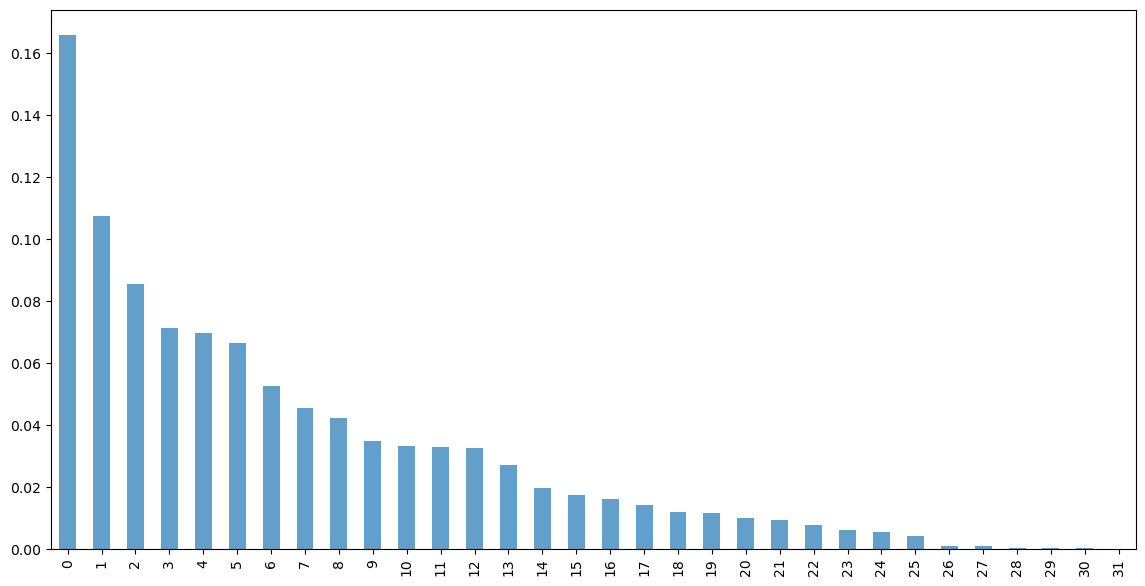

In [70]:
plt.figure(figsize=(14,7))
exp_var = pd.Series(pca.explained_variance_ratio_) 
exp_var.plot(kind="bar", alpha=0.7)

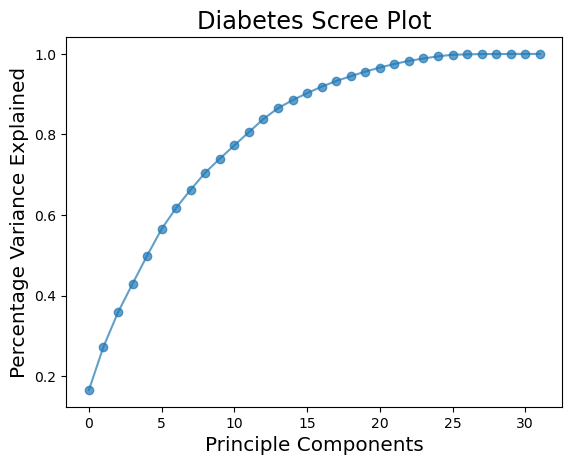

In [71]:
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)

pd.Series(var_ls).plot(marker="o", alpha=0.7)
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Diabetes Scree Plot", fontsize="xx-large")
plt.show();